# Data Loading and Preprocessing Test

This notebook demonstrates how to load and preprocess the Cats vs Dogs dataset using the project's data utilities.

In [7]:
# Import required libraries
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Add src directory to path for imports
sys.path.append(os.path.abspath('../src'))
from data_loader import load_dataset, get_dataset_info
from preprocess import preprocess_images

## Dataset Info
Let's display some information about the dataset.

In [8]:
info = get_dataset_info()
print(f"Description: {info.get('description', '-')}")
print(f"Total examples: {info.get('num_examples', '-')}")
print(f"Splits: {info.get('splits', '-')}")

INFO:absl:Load dataset info from /home/bigalex95/Projects/Pet_Projects/are-you-a-cat-mlops-pipeline/data/raw/cats_vs_dogs/4.0.1


Description: A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
Total examples: 23262
Splits: ['train']


## Load a Sample of the Dataset
We'll load a small sample (first 32 images) for quick testing.

In [9]:
images, labels = load_dataset(split='train[:32]', shuffle=False) # type: ignore
print(f'Loaded {len(images)} images, labels shape: {labels.shape}')

INFO:data_loader:Loading cats_vs_dogs dataset, split: train[:32]
INFO:data_loader:Data directory: /home/bigalex95/Projects/Pet_Projects/are-you-a-cat-mlops-pipeline/data/raw
INFO:absl:Load dataset info from /home/bigalex95/Projects/Pet_Projects/are-you-a-cat-mlops-pipeline/data/raw/cats_vs_dogs/4.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /home/bigalex95/Projects/Pet_Projects/are-you-a-cat-mlops-pipeline/data/raw/cats_vs_dogs/4.0.1.
INFO:absl:Constructing tf.data.Dataset cats_vs_dogs for split train[:32], from /home/bigalex95/Projects/Pet_Projects/are-you-a-cat-mlops-pipeline/data/raw/cats_vs_dogs/4.0.1
INFO:data_loader:Dataset info: tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/home/bigalex95/Projects

Loaded 32 images, labels shape: (32,)


## Visualize Sample Images with Labels
Let's plot a few images and their labels (0 = Cat, 1 = Dog).

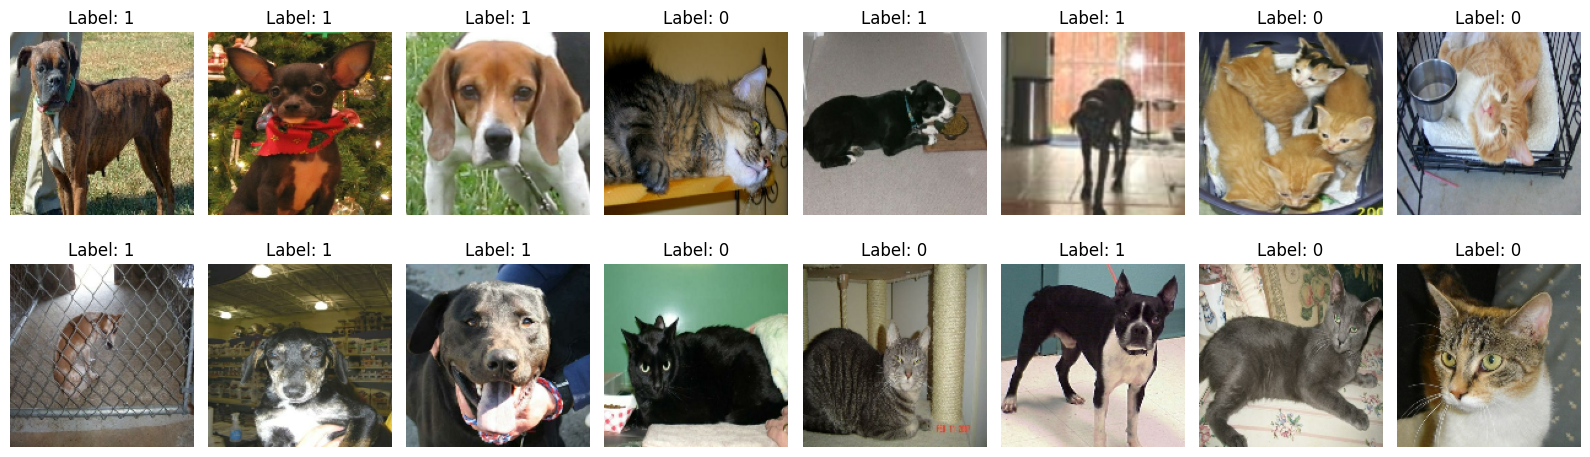

In [10]:
fig, axes = plt.subplots(2, 8, figsize=(16, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(f'Label: {labels[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

## Preprocess Images
Resize and normalize the images for model input.

In [11]:
processed_images = preprocess_images(images, target_size=(150, 150))
print(f'Processed images shape: {processed_images.shape}')
print(f'Value range: min={processed_images.min():.3f}, max={processed_images.max():.3f}')

INFO:preprocess:Preprocessing 32 images
INFO:preprocess:Input shape: (32, 150, 150, 3)
INFO:preprocess:Target size: (150, 150)
INFO:preprocess:Output shape: (32, 150, 150, 3)
INFO:preprocess:Value range: [0.000, 1.000]


Processed images shape: (32, 150, 150, 3)
Value range: min=0.000, max=1.000


## Check Label Distribution
Let's see how many cats and dogs are in our sample.

In [12]:
unique, counts = np.unique(labels, return_counts=True)
for u, c in zip(unique, counts):
    print(f'Label {u}: {c} samples')

Label 0: 13 samples
Label 1: 19 samples
